[View in Colaboratory](https://colab.research.google.com/github/bikashg3/Gartner-Hackelite-Client-Retention-Status/blob/master/Hackathon.ipynb)

#Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import sys


# Reading Data and Converting data into numeric types

In [5]:
trainData= pd.read_csv("train.csv")
retention_status=trainData['Retention Status'].values    
np.unique(trainData['Retention Status'].values)
print(retention_status.shape)


(31488,)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,27,42,57,71,84,108) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
retDropDict = {'Retained':1,'Dropped':0}
retention_status1 = np.array([retDropDict[i] for i in retention_status])
print(retention_status1.shape)
trainData['result']=retention_status1
print(trainData['result'].count())
trainData = trainData[trainData.Testimonial_0 != 'RED'] # Removing data erros
print(trainData['result'].count())


(31488,)
31488
31486


In [0]:
dict_region={}
regN=0
for reg in np.unique(trainData['Region'].values):
    dict_region[reg]=regN
    regN+=1
myArray=trainData['Region'].values
regionArray=np.array([dict_region[t] for t in myArray])
trainData['newReg']=regionArray

YN_num={"Y":1,"N":0}
listYN = ["Y","N"]

myArray=trainData['Contract Multi-Year (Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
trainData['modFeature1']=regionArray

myArray=trainData['Inquiry Eligible Flag (Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
trainData['modFeature2']=regionArray

myArray=trainData['Document_Read_Last120_Flag (Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
trainData['modFeature3']=regionArray

myArray=trainData['Inquiry_Done_Last120_Flag (Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
trainData['modFeature4']=regionArray

myArray=trainData['View_Peer_Last120_Flag(Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
trainData['modFeature5']=regionArray


myArray=trainData['Conference_Attended_Flag(Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
trainData['modFeature6']=regionArray

myArray=trainData['Symposium_Attended_Flag(Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
trainData['modFeature7']=regionArray

myArray=trainData['Testimonial_Flag(Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
trainData['modFeature8']=regionArray

myArray=trainData['Onboarding Satus(Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
trainData['modFeature9']=regionArray

listModFeat=["modFeature"+str(i) for i in range(1,10)]

In [11]:
trainData.head()
#trainData.describe.head()

,Retention Status,Unique Client Key,Region,Plan Start Year-month,Transaction Year-month,Business Unit (EU or HTTP),Contract Ending Date,Seat Registration Date,Contract Multi-Year (Y/N),Multi-Year In,...,newReg,modFeature1,modFeature2,modFeature3,modFeature4,modFeature5,modFeature6,modFeature7,modFeature8,modFeature9
0,Retained,SER11243,Region D,201609,201701,EU,2017-01-31,NaN,N,0,...,3,0,0,1,0,1,0,0,0,0
1,Dropped,SER11245,Region B,201609,201701,EU,2017-01-31,NaN,N,0,...,1,0,0,1,1,1,0,0,0,0
2,Retained,SER11246,Region B,201609,201701,EU,2017-01-31,NaN,Y,1,...,1,1,0,1,0,0,0,0,0,0
3,Retained,SER11247,Region A,201609,201701,EU,2017-01-31,NaN,Y,1,...,0,1,0,1,0,1,0,0,0,0
4,Dropped,SER11250,Region C,201609,201701,EU,2017-01-31,NaN,N,0,...,2,0,0,1,1,0,0,0,0,0


In [12]:
count=0
for t in trainData.columns:
    count+=1
    print(count,t)

1 Retention Status
2 Unique Client Key
3 Region
4 Plan Start Year-month
5 Transaction Year-month
6 Business Unit (EU or HTTP)
7 Contract Ending Date
8 Seat Registration Date
9 Contract Multi-Year (Y/N)
10 Multi-Year In
11 Multi Year Length
12 Inquiry Eligible Flag (Y/N)
13 Document_Read_12
14 Document_Read_11
15 Document_Read_10
16 Document_Read_9
17 Document_Read_8
18 Document_Read_7
19 Document_Read_6
20 Document_Read_5
21 Document_Read_4
22 Document_Read_3
23 Document_Read_2
24 Document_Read_1
25 Document_Read_0
26 Total_Document_Read_13
27 Document_Read_Last120_Flag (Y/N)
28 Inquiry_Done_12
29 Inquiry_Done_11
30 Inquiry_Done_10
31 Inquiry_Done_9
32 Inquiry_Done_8
33 Inquiry_Done_7
34 Inquiry_Done_6
35 Inquiry_Done_5
36 Inquiry_Done_4
37 Inquiry_Done_3
38 Inquiry_Done_2
39 Inquiry_Done_1
40 Inquiry_Done_0
41 Total_Inquiry_Done_12
42 Inquiry_Done_Last120_Flag (Y/N)
43 View_Peer_12
44 View_Peer_11
45 View_Peer_10
46 View_Peer_9
47 View_Peer_8
48 View_Peer_7
49 View_Peer_6
50 View_Peer

# Feature Manipulation

In [0]:
# Multi-Year In
# Multi Year Length
# Month_Contract_Period

docR_colums=["Document_Read_"+str(i) for i in range(0,13)]
InqDone_colums=["Inquiry_Done_"+str(i) for i in range(0,13)]
VPeer_colums=["View_Peer_"+str(i) for i in range(0,13)]
Sdesk_col=["Service_desk_call_"+str(i) for i in range(0,12)]
Conf_cols=["Conference_Attended_"+str(i) for i in range(0,12)]
syA_cols=["Symposium_Attended_"+str(i) for i in range(0,12)]
testm_cols=["Testimonial_"+str(i) for i in range(0,12)]
meet_cols=["1:1_Meeting_"+str(i) for i in range(0,12)]

colsMultiSum=['Total_Document_Read_13','Total_Inquiry_Done_12','Total_View_Peer_13','Total_Service_desk_call_12'
              ,'Total_1:1_Meeting_12','Multi-Year In','Multi Year Length','Month_Contract_Period']
colsMultiSum1=['Multi-Year In','Multi Year Length','Month_Contract_Period']

colFeatureResult = docR_colums + InqDone_colums+VPeer_colums+Sdesk_col+Conf_cols+syA_cols+testm_cols+meet_cols+colsMultiSum+listModFeat
# colFeatureResult.append("newReg") # not used
# colFeatureResult.append("result")

# Document_Read_0:Document_Read_12 --> Total_Document_Read_13
# Inquiry_Done_0:Inquiry_Done_12 --> Total_Inquiry_Done_12
# View_Peer_0:View_Peer_12 --> Total_View_Peer_13
# Service_desk_call_0:Service_desk_call_11 -->  Total_Service_desk_call_12
# Conference_Attended_0:Conference_Attended_11
# Symposium_Attended_0:Symposium_Attended_11
# Testimonial_0:Testimonial_11
# 1:1_Meeting_0:1:1_Meeting_11 --> Total_1:1_Meeting_12

# Split Data

In [15]:

x_train, x_test, y_train, y_test = train_test_split(trainData[colFeatureResult],trainData["result"], test_size=0.20, random_state=42)

for column in x_train.columns:
    x_train[column] = x_train[column].convert_objects(convert_numeric=True)
    x_test[column] = x_test[column].convert_objects(convert_numeric=True)

x_train.convert_objects(convert_numeric=True)
x_test.convert_objects(convert_numeric=True)
x_train=x_train.fillna(value=0.0)
x_test=x_test.fillna(value=0.0)
x_train.apply(pd.to_numeric, errors='force')
x_test.apply(pd.to_numeric, errors='force')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: convert_objects

,Document_Read_0,Document_Read_1,Document_Read_2,Document_Read_3,Document_Read_4,Document_Read_5,Document_Read_6,Document_Read_7,Document_Read_8,Document_Read_9,...,Month_Contract_Period,modFeature1,modFeature2,modFeature3,modFeature4,modFeature5,modFeature6,modFeature7,modFeature8,modFeature9
29627,12.0,60.0,51.0,9.0,15.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0,1,1,1,1,1,0,0,0
20156,9.0,2.0,0.0,6.0,0.0,0.0,4.0,0.0,14.0,0.0,...,11.0,1,1,1,0,0,0,0,0,0
14095,18.0,80.0,24.0,112.0,52.0,46.0,24.0,32.0,28.0,0.0,...,12.0,0,1,1,1,1,0,0,0,0
24443,23.0,11.0,14.0,8.0,2.0,14.0,13.0,9.0,18.0,12.0,...,12.0,0,0,1,0,0,0,0,0,0
3710,12.0,6.0,0.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,...,5.0,1,0,1,0,0,0,0,0,0
19372,18.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,...,12.0,1,0,1,0,1,0,0,0,0
13308,4.0,28.0,6.0,16.0,8.0,0.0,10.0,12.0,2.0,18.0,...,12.0,0,1,1,1,1,0,0,0,0
20478,64.0,12.0,22.0,120.0,86.0,80.0,58.0,12.0,4.0,50.0,...,12.0,1,1,1,1,1,0,0,0,0
11852,0.0,0.0,0.0,0.0,1.0,1.0,6.0,14.0,5.0,0.0,...,9.0,0,0,0,0,0,0,0,0,0
7091,0.0,3.0,0.0,0.0,8.0,13.0,4.0,4.0,1.0,7.0,...,12.0,1,0,1,0,0,0,0,0,0


# Random Forest (randFr)
 Best Model
---



In [39]:
numTrees=[1500]
randomDict={}
for numTree in numTrees:
    randFr = RandomForestClassifier(n_estimators=numTree, oob_score=True, random_state=42)
    randFr.fit(x_train, y_train)
    randomDict[numTree]=randFr
    predicted = randFr.predict(x_test)
    randFr_accuracy = accuracy_score(y_test, predicted)
    #feature_importances = trainData(randFr.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance', ascending=False)
    print("#################################")
    print(numTree)
    #print(feature_importances)
    print(f'Out-of-bag score estimate: {randFr.oob_score_:.3}')
    print(f'Mean accuracy score: {randFr_accuracy:.3}')
# feature_importances = trainData[(randFr.feature_importances_,index = x_train.columns,columns=['importance'])].sort_values('importance', ascending=False)
# print(feature_importances)

#################################
1500
Out-of-bag score estimate: 0.857
Mean accuracy score: 0.861


106 99 0 1 2 4 3 101 102 5 11 10 104 7 6 9 8 12 39 100 109 105 30 43 32 40 37 35 34 31 33 36 29 41 42 44 108 27 28 46 49 45 48 50 47 38 26 111 107 110 112 17 14 13 15 16 103 18 19 22 23 20 21 113 24 25 77 79 76 78 80 58 51 83 60 54 84 56 57 62 65 81 82 59 67 52 85 86 68 53 55 61 89 92 64 69 91 96 94 98 66 93 87 63 75 90 88 95 97 71 70 74 73 72 114 115
Feature ranking:
1. feature Testimonial_2tr (0.209962)
2. feature Testimonial_9tr (0.047767)
3. feature Retention Statustr (0.042070)
4. feature Unique Client Keytr (0.032053)
5. feature Regiontr (0.028790)
6. feature Transaction Year-monthtr (0.026925)
7. feature Plan Start Year-monthtr (0.025653)
8. feature Testimonial_7tr (0.023731)
9. feature Testimonial_6tr (0.023600)
10. feature Business Unit (EU or HTTP)tr (0.023201)
11. feature Inquiry Eligible Flag (Y/N)tr (0.022793)
12. feature Multi Year Lengthtr (0.022237)
13. feature Testimonial_4tr (0.021723)
14. feature Seat Registration Datetr (0.021654)
15. feature Contract Ending Datetr 

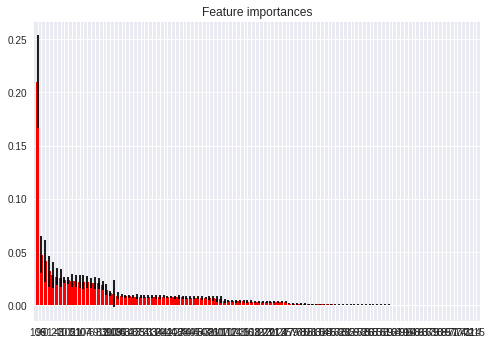

In [31]:
importances = randFr.feature_importances_
std = np.std([tree.feature_importances_ for tree in randFr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
#print(*indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %str (%f)" % (f + 1, trainData.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

# Reading Test Data & applying Feature Selection

In [32]:
testData= pd.read_csv("test.csv")

myArray=testData['Contract Multi-Year (Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
testData['modFeature1']=regionArray

myArray=testData['Inquiry Eligible Flag (Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
testData['modFeature2']=regionArray

myArray=testData['Document_Read_Last120_Flag (Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
testData['modFeature3']=regionArray

myArray=testData['Inquiry_Done_Last120_Flag (Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
testData['modFeature4']=regionArray

myArray=testData['View_Peer_Last120_Flag(Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
testData['modFeature5']=regionArray


myArray=testData['Conference_Attended_Flag(Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
testData['modFeature6']=regionArray

myArray=testData['Symposium_Attended_Flag(Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
testData['modFeature7']=regionArray

myArray=testData['Testimonial_Flag(Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
testData['modFeature8']=regionArray

myArray=testData['Onboarding Satus(Y/N)'].values
regionArray=np.array([YN_num[t] if t in listYN else 0 for t in myArray])
testData['modFeature9']=regionArray


myArrayO=testData['Region'].values
regionArrayO=np.array([dict_region[t] for t in myArrayO])
testData['newReg']=regionArrayO


testData_subset=testData[colFeatureResult]
print(testData_subset.values.shape)
for column in testData_subset.columns:
    testData_subset[column] = testData_subset[column].convert_objects(convert_numeric=True)
    
testData_subset.convert_objects(convert_numeric=True)
testData_subset=testData_subset.fillna(value=0.0)
testData_subset.apply(pd.to_numeric, errors='force')

print(testData_subset.values.shape)



(6910, 116)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(6910, 116)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


# Predicting and Saving Output

In [33]:
predicted2 = randomDict[1500].predict(testData_subset)
myDictionary1={1:'Retained',0:'Dropped'}
retention_status2=np.array([myDictionary1[t] for t in predicted2])
resultDf=testData["Unique Client Key"].to_frame()
print(type(resultDf))
resultDf["Retention Status"]=retention_status2
print(resultDf.head())
print(retention_status2.shape)
resultDf.to_csv('currentPred.csv', sep=',',index=False)

<class 'pandas.core.frame.DataFrame'>
  Unique Client Key Retention Status
0          SER53746         Retained
1          SER53747         Retained
2          SER53748         Retained
3          SER53749          Dropped
4          SER53750         Retained
(6910,)


# Comparing my current Prediction with my best one

In [38]:
myBest= pd.read_csv("best.csv")["Retention Status"].values
myCurrent=pd.read_csv("currentPred.csv")["Retention Status"].values
accuracy = accuracy_score(myBest, myCurrent)
print(accuracy)

0.9732272069464544


In [0]:
testData= pd.read_csv("test.csv")

myArrayO=testData['Region'].values
regionArrayO=np.array([dict_region[t] for t in myArrayO])
testData['newReg']=regionArrayO


testData_subset=testData[colFeatureResult]
print(testData_subset.values.shape)
for column in testData_subset.columns:
    testData_subset[column] = testData_subset[column].convert_objects(convert_numeric=True)
    
testData_subset.convert_objects(convert_numeric=True)
testData_subset=testData_subset.fillna(value=0.0)
testData_subset.apply(pd.to_numeric, errors='force')

print(testData_subset.values.shape)

dtestFinal = xgb.DMatrix(testData_subset)

preds = bst.predict(dtestFinal)

predicted2 = np.asarray([np.argmax(line) for line in preds])


myDictionary1={1:'Retained',0:'Dropped'}
retention_status2=np.array([myDictionary1[t] for t in predicted2])
resultDf=testData["Unique Client Key"].to_frame()
print(type(resultDf))
resultDf["Retention Status"]=retention_status2
print(resultDf.head())
print(retention_status2.shape)
resultDf.to_csv('myResult.csv', sep=',',index=False)



# Train Using Scaling and Tranformation feature

In [0]:
x_train, x_test, y_train, y_test = train_test_split(trainData[colFeatureResult],trainData["result"], test_size=0.3, random_state=42)
x_train=x_train.fillna(value=0)
x_test=x_test.fillna(value=0)



scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

pca.fit(x_train)

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

# Random Forest Classifier (rfc or randFrCl)

In [35]:
randFrClf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
randFrClf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [36]:
rfc_predicted = randFrClf.predict(x_test)
rfc_accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {randFrClf.oob_score_:.3}')
print(f'Mean accuracy score: {rfc_accuracy:.3}')

Out-of-bag score estimate: 0.851
Mean accuracy score: 0.861


# Xgboost (xgb)

In [37]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)


param = {
    'max_depth': 50,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 2}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

bst = xgb.train(param, dtrain, num_round)

preds = bst.predict(dtest)

best_preds = np.asarray([np.argmax(line) for line in preds])

xgb_accuracy = accuracy_score(y_test, best_preds)
print(f'Mean accuracy score: {xgb_accuracy:.3}')

Mean accuracy score: 0.864


In [0]:
# countStr=0
# for t in (x_train['Document_Read_12'].values):
#     if(type(t)==str):
#         countStr+=1
        
# print(countStr)